# Distribution Functions

---
# Bikes Distribution

## Related files:
 - dc_bikes_clean.csv

## Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd

In [2]:
# read csv
df = pd.read_csv('../data/dc_bikes_clean.csv', parse_dates = True, index_col = 0)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,1,Saturday,0,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,Saturday,1,0,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,1,Saturday,2,0,night


### 1. Filter bike data for one day

In [3]:
# df_subset = df[df.index.day_name() == 'Saturday'] ---> to get all observations that fall on a Saturday
# df_subset = df[(df.index.year == 2011) & (df.index.month == 6) & (df.index.day == 13)] ---> to get all observations on 2011-06-13
df_subset = df.loc['2011-06-13']
df_subset.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-06-13 00:00:00,2,0,1,1,26.24,29.545,78,8.9981,8.0,20.0,28,2011,2,6,13,Monday,0,0,night
2011-06-13 01:00:00,2,0,1,1,26.24,30.305,73,15.0013,6.0,10.0,16,2011,2,6,13,Monday,1,0,night
2011-06-13 02:00:00,2,0,1,1,25.42,29.545,73,19.0012,2.0,8.0,10,2011,2,6,13,Monday,2,0,night
2011-06-13 03:00:00,2,0,1,1,24.60,30.305,60,32.9975,1.0,6.0,7,2011,2,6,13,Monday,3,0,night
2011-06-13 04:00:00,2,0,1,1,22.96,26.515,64,19.9995,1.0,3.0,4,2011,2,6,13,Monday,4,0,night


### 2. Using `sns.displot()` plot the distribution of the count during that day (Try setting the parameter `kde=True`). More info on this plotting function here: [displot](https://seaborn.pydata.org/generated/seaborn.displot.html)

In [4]:
df_subset[(df['count'] > 90) & (df['count'] < 150)] 

/var/folders/w5/7h1pv145523djq7r2_zpl8ph0000gn/T/ipykernel_3852/3128736186.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subset[(df['count'] > 90) & (df['count'] < 150)]


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-06-13 06:00:00,2,0,1,1,22.14,25.76,64,27.9993,7.0,98.0,105,2011,2,6,13,Monday,6,0,morning
2011-06-13 10:00:00,2,0,1,1,26.24,31.06,41,22.0028,38.0,80.0,118,2011,2,6,13,Monday,10,0,morning
2011-06-13 22:00:00,2,0,1,1,25.42,31.06,46,15.0013,20.0,114.0,134,2011,2,6,13,Monday,22,0,evening


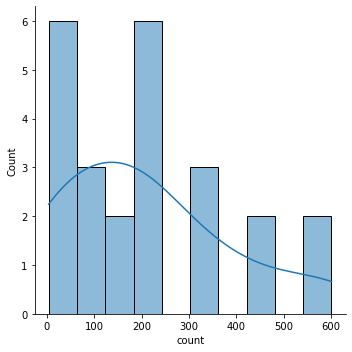

In [5]:
# frequency
sns.displot(data = df_subset, x = 'count', kde = True, bins = 10);
    # explanation: the number of instances where there were rentals between 90 and 150 is 3

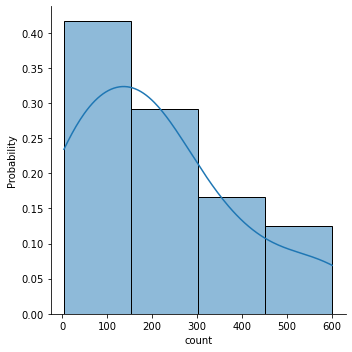

In [6]:
# probability
sns.displot(data = df_subset, x = 'count', kde = True, bins = 4, stat = 'probability');
    # the curve tries to fit all data in the histogram but the y-axis does not have anything to do with the the kde curve

### 3. Filter bike data for the year 2011

In [7]:
df_subset = df[df.index.year == 2011]
df_subset.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,1,Saturday,0,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,Saturday,1,0,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,1,Saturday,2,0,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,1,Saturday,3,0,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,1,Saturday,4,0,night


### 4. Again using `sns.displot()` plot the distribution of the temperature of the entire year

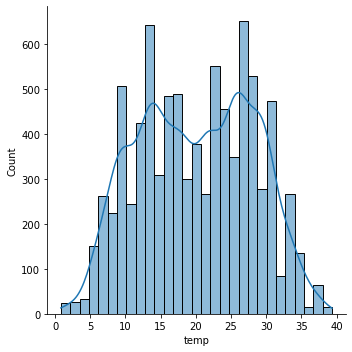

In [8]:
# frequency
sns.displot(data = df_subset, x = 'temp', kde = True);

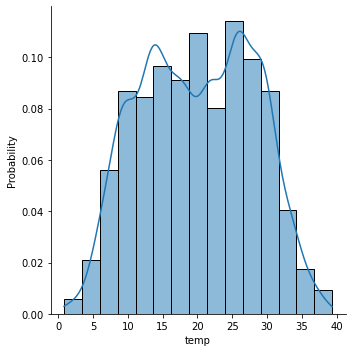

In [9]:
# probability
sns.displot(data = df_subset, x = 'temp', kde = True, stat = 'probability', bins = 15);

---

# Additional analysis

## Plot the density distribution of temp and atemp

In [10]:
# melt
df_sub = df.melt(id_vars = ['year', 'month', 'day', 'day_name', 'count'],
                             value_vars = ['temp', 'atemp'],
                             var_name = 'temp_type',
                             value_name = 'celsius')
df_sub

,year,month,day,day_name,count,temp_type,celsius
0,2011,1,1,Saturday,16,temp,9.840
1,2011,1,1,Saturday,40,temp,9.020
2,2011,1,1,Saturday,32,temp,9.020
3,2011,1,1,Saturday,13,temp,9.840
4,2011,1,1,Saturday,1,temp,9.840
...,...,...,...,...,...,...,...
34753,2012,12,31,Monday,156,atemp,12.880
34754,2012,12,31,Monday,104,atemp,12.880
34755,2012,12,31,Monday,67,atemp,12.880
34756,2012,12,31,Monday,43,atemp,13.635


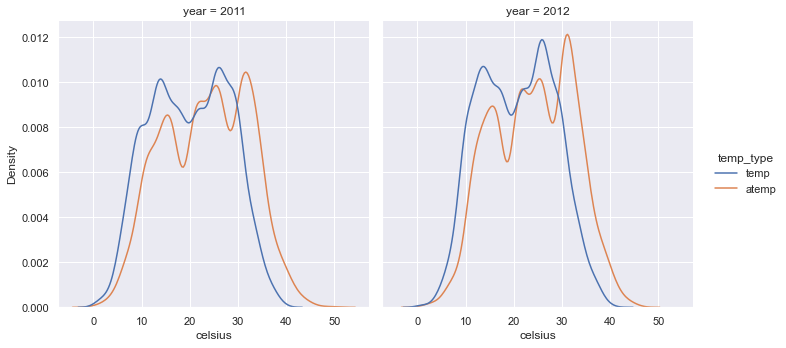

In [25]:
# method A:
sns.set_theme(style = 'darkgrid')
sns.displot(df_sub, 
            x = 'celsius', 
            # y = 'count', 
            # multiple = 'layer',
            # cumulative = True,
            alpha = 1,
            hue = 'temp_type',
            col = 'year',
            # palette = 'crest',
            # stat = 'density',
        kind = 'kde'
           );

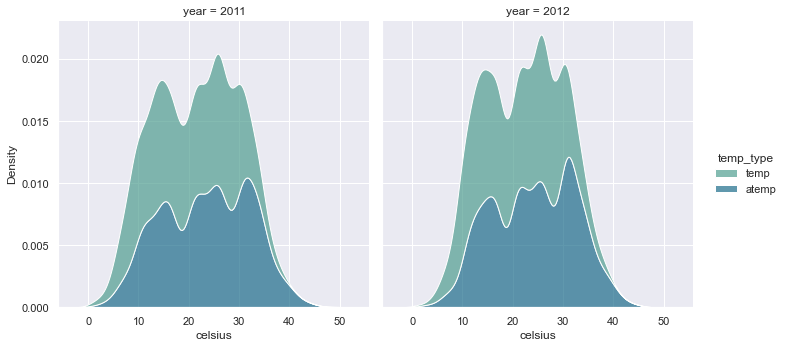

In [12]:
# method B:
sns.set_theme(style = 'darkgrid')
sns.displot(df_sub, x = 'celsius', 
            # y = 'count', 
            multiple = 'stack',
            # cumulative = True,
            alpha = 0.7,
            hue = 'temp_type',
            col = 'year',
            palette = 'crest',
            # stat = 'density',
            kind = 'kde'
           );

In [13]:
# pivot table
df_subset = df_sub.pivot_table(
    columns = 'temp_type',
    index = ['year','month', 'day_name'],
    values = 'celsius',
    aggfunc = 'mean').reset_index().set_index(['year','month'])
df_subset

temp_type    day_name      atemp       temp
year month                                 
2011 1         Friday   9.710269   7.565161
     1         Monday   8.210726   6.567009
     1       Saturday  10.709025   8.234746
     1         Sunday  10.502607   8.564444
     1       Thursday  10.673291   8.563291
...               ...        ...        ...
2012 12      Saturday  15.233083  12.491333
     12        Sunday  16.104625  13.085833
     12      Thursday  13.928125  11.642292
     12       Tuesday  18.938789  15.735368
     12     Wednesday  16.098073  13.444583

[168 rows x 3 columns]

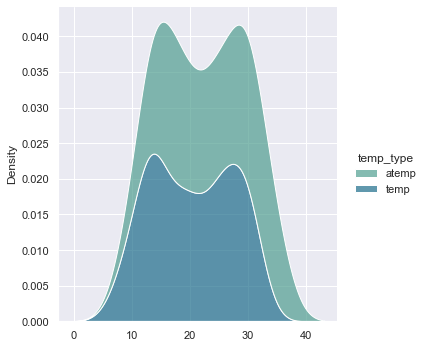

In [14]:
sns.set_theme(style = 'darkgrid')
sns.displot(df_subset, 
            multiple = 'stack',
            # cumulative = True,
            alpha = 0.7,
            palette = 'crest',
            kind = 'kde');
    # explanation: with temp, it is bimodal and the mode is at around 12 and 28